In [1]:
import pandas as pd
df = pd.read_csv('encoded.csv', index_col=0)
df.head()

C:\Users\Dimasyan\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


,date,time,district,n_p,dtp_v,s_pch,osv,change_org_motion,woman_drv,pogoda,driver_narush,alco,posled,sdor
0,2015-05-12,09:20:00,КАШАРСКИЙ,сл Кашары,1,1,2,2,1,1,1,0,1,5
1,2016-03-09,17:20:00,КАШАРСКИЙ,NaN,0,1,2,2,0,1,1,0,1,5
2,2018-08-19,17:40:00,КАШАРСКИЙ,NaN,0,1,2,2,0,1,1,0,0,5
3,2018-08-08,14:15:00,КАШАРСКИЙ,NaN,0,1,2,2,1,1,1,0,1,5
4,2015-03-07,21:15:00,КАШАРСКИЙ,NaN,1,1,0,1,0,1,1,1,2,5


In [2]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
plt.style.use('ggplot')
import warnings
import itertools
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In C:\Users\Dimasyan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\Dimasyan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Dimasyan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\Dimasyan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Dimasyan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [3]:
dfl = df[df['n_p']=='г Москва']

In [4]:
dfl = dfl.sort_values(by=['date'])
dfl

,date,time,district,n_p,dtp_v,s_pch,osv,change_org_motion,woman_drv,pogoda,driver_narush,alco,posled,sdor
418948,2015-01-01,21:40:00,Измайлово,г Москва,2,1,1,1,0,2,1,0,0,7
405991,2015-01-01,23:40:00,Царицыно,г Москва,1,0,1,1,0,2,0,1,0,5
405008,2015-01-01,06:20:00,Чертаново Южное,г Москва,1,0,1,2,0,2,1,0,0,6
423479,2015-01-01,00:23:00,Котловка,г Москва,2,1,1,2,0,2,1,1,2,5
393190,2015-01-01,18:18:00,Хорошевский,г Москва,2,0,1,2,0,2,1,0,0,7
463401,2015-01-01,17:20:00,Московский,г Москва,1,0,1,1,0,0,0,1,2,3
442768,2015-01-01,01:39:00,Солнцево,г Москва,2,1,1,2,0,2,1,0,1,1
294482,2015-01-01,04:05:00,Северное Тушино,г Москва,2,0,2,2,0,2,1,1,1,7
421200,2015-01-01,21:00:00,Ясенево,г Москва,2,0,1,2,0,0,1,1,1,5
420853,2015-01-01,05:20:00,Богородское,г Москва,2,1,1,2,0,2,1,0,0,4


In [5]:
dfl = dfl[['date']].copy()
dfl['dtp'] = 1
dfl.head()
dfl.date = pd.to_datetime(df.date)
dfl.head()

,date,dtp
418948,2015-01-01,1
405991,2015-01-01,1
405008,2015-01-01,1
423479,2015-01-01,1
393190,2015-01-01,1


In [89]:
df = df.sort_values(by=['date'])
df = df[['date']].copy()
df['dtp'] = 1
df.date = pd.to_datetime(df.date)
df.head()

,date,dtp
343040,2015-01-01,1
539432,2015-01-01,1
539433,2015-01-01,1
459293,2015-01-01,1
529159,2015-01-01,1


In [105]:
y = df.groupby(pd.Grouper(key='date',freq='M')).count()
y

,dtp
date,
2015-01-31,12546
2015-02-28,10719
2015-03-31,11257
2015-04-30,12567
2015-05-31,16058
2015-06-30,17062
2015-07-31,17573
2015-08-31,18791
2015-09-30,17947


In [82]:
y = dfl.groupby(pd.Grouper(key='date',freq='D')).count()
y

,dtp
date,
2015-01-01,19
2015-01-02,23
2015-01-03,16
2015-01-04,17
2015-01-05,17
2015-01-06,20
2015-01-07,15
2015-01-08,21
2015-01-09,22


In [107]:
split_date ='2018-12-30'
df_training = y.loc[y.index <= split_date]
df_test = y.loc[y.index > split_date]
print(f"{len(df_training)} weeks of training data \n {len(df_test)} weeks of testing data ")

47 weeks of training data 
 12 weeks of testing data 


In [65]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    return({'Средняя абсолютная процентная ошибка':mape, 'Средняя ошибка':me, 'Средняя абсолютная ошибка': mae, 
            'Средняя ошибка в процентах': mpe, 'Среднеквадратичная ошибка':rmse, #'acf1':acf1, 
            'Соотношение фактического и прогноза':corr, 'Мин-макс ошибка':minmax})

# ARIMA 

## По РФ

## Посуточное прогнозирование значений ДТП

In [93]:
model = pm.auto_arima(df_training, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=30,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

C:\Users\Dimasyan\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (30) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18582.839, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18971.017, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18920.899, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18831.434, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18969.017, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=18547.415, Time=1.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=18803.013, Time=0.20 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=18547.553, Time=1.52 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=18540.721, Time=1.60 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=18551.592, Time=0.94 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=18550.870, Time=1.89 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=18300.418, Time=3.25 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=18552.513, Time=1.55 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=18275.682, Time=3.88 sec
 ARIMA(3,1,3)(0,0,0

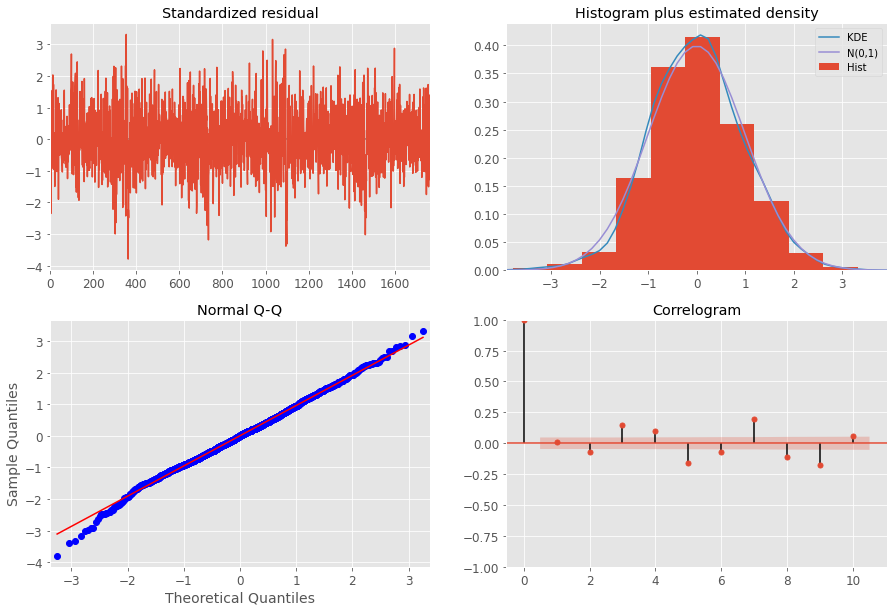

In [94]:
model.plot_diagnostics(figsize=(15,10))
plt.show()

1. Остаточные ошибки колеблются около нулевого среднего и имеют равномерную дисперсию.
2. График плотности предполагает нормальное распределение со средним нулевым значением.
3. Все точки практически совпадают с красной линии, следовательно распределение не искажено.
4. График коррелограммы, также известный как ACF, показывает, что остаточные ошибки не автокоррелированы. Любая автокорреляция будет означать, что существует некоторая закономерность в остаточных ошибках, которая не объясняется в модели.

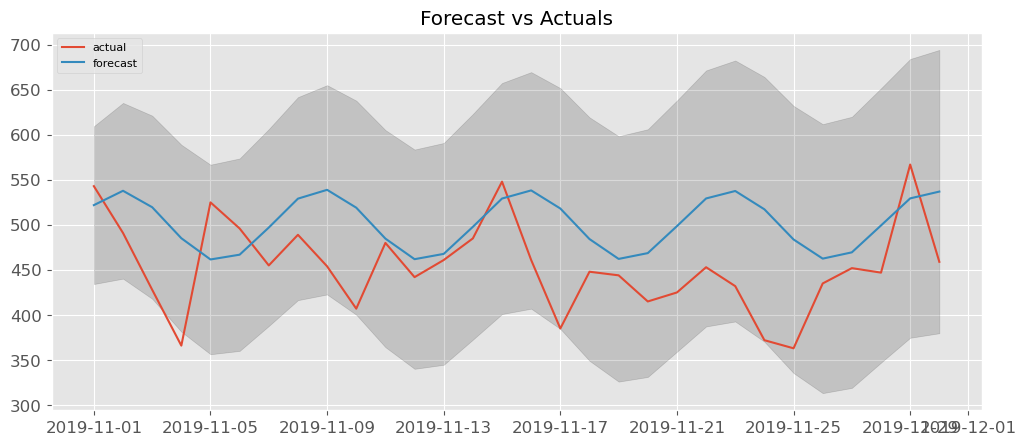

{'Средняя абсолютная процентная ошибка': 0.1383680736980575,
 'Средняя ошибка': 47.57741064420452,
 'Средняя абсолютная ошибка': 58.89842601299593,
 'Средняя ошибка в процентах': 0.11713030516377082,
 'Среднеквадратичная ошибка': 71.1599413394327,
 'Соотношение фактического и прогноза': 0.16568558431716665,
 'Мин-макс ошибка': 0.1150194430448408}

In [95]:
n_periods = 30
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
#index_of_fc = pd.date_range(df_training.index[-1], periods = n_periods, freq='MS')
#index_of_fc = np.arange(len(df_training), len(df_training)+n_periods)
# make series for plotting purpose
fc_series = pd.Series(fc, index=df_test.index)
lower_series = pd.Series(confint[:, 0], index=df_test.index)
upper_series = pd.Series(confint[:, 1], index=df_test.index)
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(y, label='training')
plt.plot(df_test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
forecast_accuracy(fc,df_test.dtp.values)

### Метрики прогноза порядок авторегрессии p = 3,порядок интегрирования d=1,порядок скользящего среднего q=3. Серый цвет показывает пределы прогнозирования.

## Понедельное прогнозирование значений ДТП

In [100]:
model = pm.auto_arima(df_training, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=7,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

C:\Users\Dimasyan\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3356.522, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4574.643, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3355.740, Time=0.28 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=3356.030, Time=0.38 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=3349.050, Time=0.33 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.35 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=3344.158, Time=0.49 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=3346.550, Time=0.49 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=3346.479, Time=0.16 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=3338.333, Time=0.58 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=3343.540, Time=0

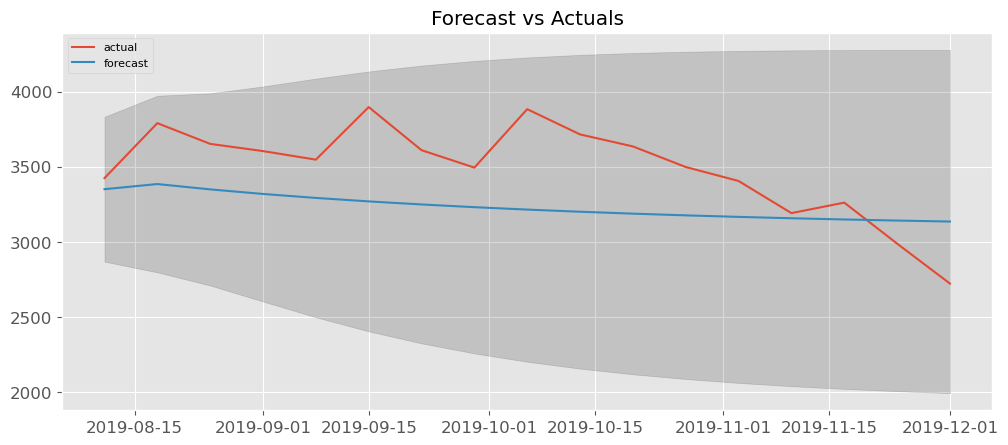

{'Средняя абсолютная процентная ошибка': 0.090750483718874,
 'Средняя ошибка': -255.63320645695416,
 'Средняя абсолютная ошибка': 322.28870715620536,
 'Средняя ошибка в процентах': -0.06686211226124714,
 'Среднеквадратичная ошибка': 366.4206415330032,
 'Соотношение фактического и прогноза': 0.582855950586354,
 'Мин-макс ошибка': 0.0894276882893913}

In [101]:
n_periods = 17
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
#index_of_fc = pd.date_range(df_training.index[-1], periods = n_periods, freq='MS')
#index_of_fc = np.arange(len(df_training), len(df_training)+n_periods)
# make series for plotting purpose
fc_series = pd.Series(fc, index=df_test.index)
lower_series = pd.Series(confint[:, 0], index=df_test.index)
upper_series = pd.Series(confint[:, 1], index=df_test.index)
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(y, label='training')
plt.plot(df_test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
forecast_accuracy(fc,df_test.dtp.values)

## Помесячное прогнозирование значений ДТП

In [108]:
model = pm.auto_arima(df_training, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

C:\Users\Dimasyan\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=842.377, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1037.430, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=845.956, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=836.702, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=838.302, Time=0.13 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=838.401, Time=0.24 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=840.657, Time=0.38 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=826.972, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=830.448, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=834.160, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=817.778, Time=0.14 s

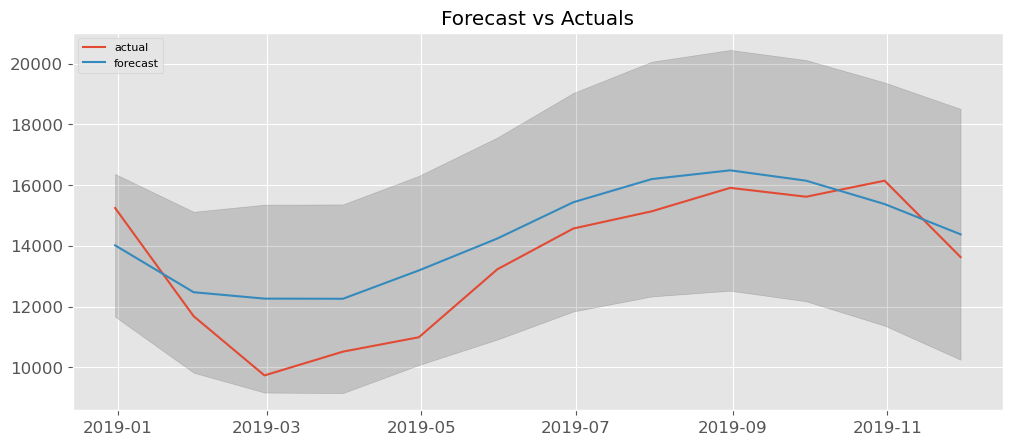

{'Средняя абсолютная процентная ошибка': 0.09606856905713879,
 'Средняя ошибка': 837.8203099542424,
 'Средняя абсолютная ошибка': 1171.0861386352458,
 'Средняя ошибка в процентах': 0.074675117012276,
 'Среднеквадратичная ошибка': 1325.1724122863625,
 'Соотношение фактического и прогноза': 0.9083766007091348,
 'Мин-макс ошибка': 0.08494792492083736}

In [109]:
n_periods = 12
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
#index_of_fc = pd.date_range(df_training.index[-1], periods = n_periods, freq='MS')
#index_of_fc = np.arange(len(df_training), len(df_training)+n_periods)
# make series for plotting purpose
fc_series = pd.Series(fc, index=df_test.index)
lower_series = pd.Series(confint[:, 0], index=df_test.index)
upper_series = pd.Series(confint[:, 1], index=df_test.index)
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(y, label='training')
plt.plot(df_test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
forecast_accuracy(fc,df_test.dtp.values)

## По Москве

## Посуточное прогнозирование значений ДТП

In [84]:
model = pm.auto_arima(df_training, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=11391.162, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=16201.166, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=12266.033, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=14733.564, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=11380.862, Time=0.64 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=11854.975, Time=0.23 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=11379.825, Time=0.76 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=11697.761, Time=0.34 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=11377.898, Time=1.28 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.99 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=11382.358, Time=0.89 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=11378.971, Time=1.40 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.52 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0]          
Total fit time: 9.812 seconds
                     

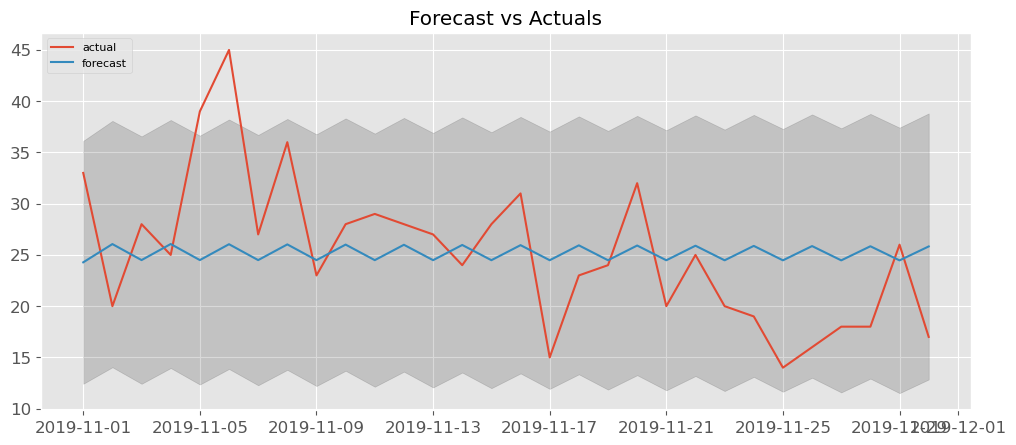

{'Средняя абсолютная процентная ошибка': 0.2426153350160605,
 'Средняя ошибка': -0.055521870381569846,
 'Средняя абсолютная ошибка': 5.635378877076203,
 'Средняя ошибка в процентах': 0.07720177744560583,
 'Среднеквадратичная ошибка': 7.058877744070774,
 'Соотношение фактического и прогноза': 0.10020022681885674,
 'Мин-макс ошибка': 0.1932307468619815}

In [85]:
n_periods = 30
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
#index_of_fc = pd.date_range(df_training.index[-1], periods = n_periods, freq='MS')
#index_of_fc = np.arange(len(df_training), len(df_training)+n_periods)
# make series for plotting purpose
fc_series = pd.Series(fc, index=df_test.index)
lower_series = pd.Series(confint[:, 0], index=df_test.index)
upper_series = pd.Series(confint[:, 1], index=df_test.index)
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(y, label='training')
plt.plot(df_test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
forecast_accuracy(fc,df_test.dtp.values)

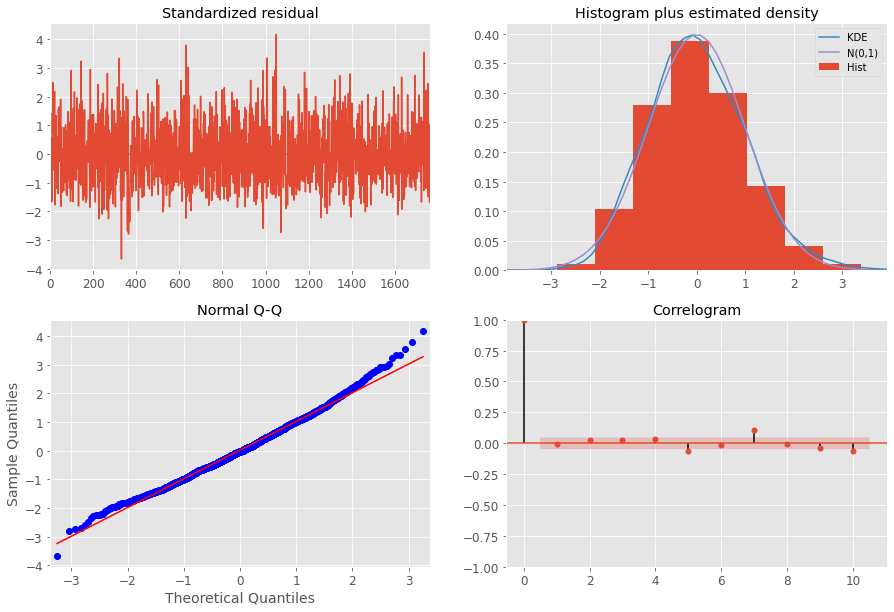

In [86]:
model.plot_diagnostics(figsize=(15,10))
plt.show()

## Понедельное прогнозирование значений ДТП

In [76]:
model = pm.auto_arima(df_training, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=4,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

C:\Users\Dimasyan\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (4) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2182.944, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2244.795, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2207.765, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2182.966, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2242.820, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2184.944, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2184.944, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2183.058, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2199.633, Time=0.21 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2186.005, Time=0.42 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2180.953, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2180.980, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2205.801, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2182.953, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]          

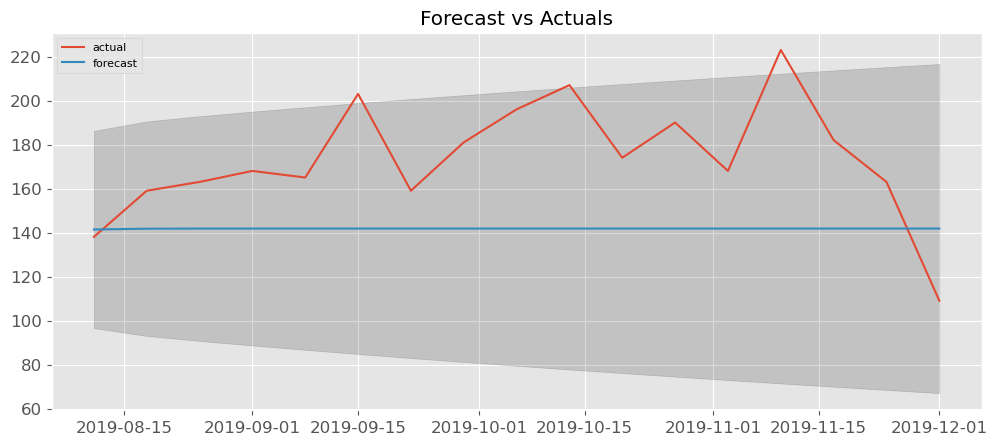

{'Средняя абсолютная процентная ошибка': 0.1992591702742083,
 'Средняя ошибка': -31.629868417228142,
 'Средняя абсолютная ошибка': 35.88876394872953,
 'Средняя ошибка в процентах': -0.16095553725353626,
 'Среднеквадратичная ошибка': 40.9591050649625,
 'Соотношение фактического и прогноза': 0.3628215211836442,
 'Мин-макс ошибка': 0.19512763570022063}

In [78]:
n_periods = 17
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
#index_of_fc = pd.date_range(df_training.index[-1], periods = n_periods, freq='MS')
#index_of_fc = np.arange(len(df_training), len(df_training)+n_periods)
# make series for plotting purpose
fc_series = pd.Series(fc, index=df_test.index)
lower_series = pd.Series(confint[:, 0], index=df_test.index)
upper_series = pd.Series(confint[:, 1], index=df_test.index)
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(y, label='training')
plt.plot(df_test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
forecast_accuracy(fc,df_test.dtp.values)

## Помесячное прогнозирование значений ДТП

In [67]:
model = pm.auto_arima(df_training, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

C:\Users\Dimasyan\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=554.304, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=555.068, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=554.336, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=552.318, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.492 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   47
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -275.159
Date:                Wed, 05 May 2021   AIC                            552.318
Time:                        22:23:58   BIC                            554.147
Sample:                             0   HQIC                           553.003
                                 - 47                                         
Covari

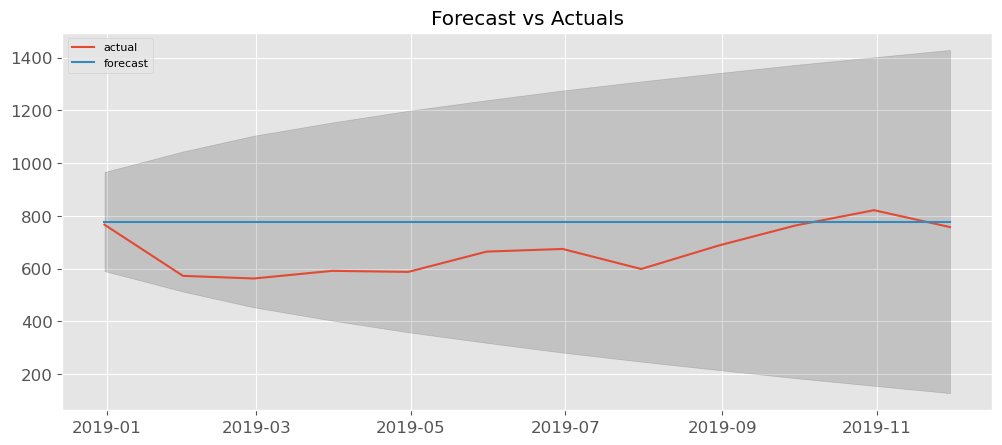

C:\Users\Dimasyan\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Dimasyan\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


{'Средняя абсолютная процентная ошибка': 0.18798341645983105,
 'Средняя ошибка': 107.75,
 'Средняя абсолютная ошибка': 114.91666666666667,
 'Средняя ошибка в процентах': 0.1792648438726453,
 'Среднеквадратичная ошибка': 137.6931976049168,
 'Соотношение фактического и прогноза': nan,
 'Мин-макс ошибка': 0.1472775575815688}

In [71]:
n_periods = 12
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
#index_of_fc = pd.date_range(df_training.index[-1], periods = n_periods, freq='MS')
#index_of_fc = np.arange(len(df_training), len(df_training)+n_periods)
# make series for plotting purpose
fc_series = pd.Series(fc, index=df_test.index)
lower_series = pd.Series(confint[:, 0], index=df_test.index)
upper_series = pd.Series(confint[:, 1], index=df_test.index)
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(y, label='training')
plt.plot(df_test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
forecast_accuracy(fc,df_test.dtp.values)

# SARIMA

## По РФ

## Посуточное прогнозирование значений ДТП

In [96]:
smodel = pm.auto_arima(df_training, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=1,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18582.839, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18971.017, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18920.899, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18831.434, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18969.017, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=18547.415, Time=1.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=18803.013, Time=0.21 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=18547.553, Time=1.53 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=18540.721, Time=1.70 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=18551.592, Time=0.86 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=18550.870, Time=1.97 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=18300.425, Time=3.05 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=18552.513, Time=1.53 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=18275.735, Time=3.72 sec
 ARIMA(3,1,3)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1765
Model:               SARIMAX(3, 1, 3)   Log Likelihood               -9130.510
Date:                Wed, 05 May 2021   AIC                          18275.020
Time:                        22:55:41   BIC                          18313.347
Sample:                             0   HQIC                         18289.182
                               - 1765                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5106      0.037     41.161      0.000       1.439       1.583
ar.L2         -1.3298      0.046    -29.041      0.000      -1.420      -1.240
ar.L3          0.2662      0.037      7.294      0.000       0.195       0.338
ma.L1         -2.0167      0.024    -83.784      0.000      -2.064      -1.969
ma.L2          1.9191      0.032     59.751      0.000       1.856       1.982
ma.L3         -0.7624      0.023    -33.686      0.000      -0.807      -0.718
sigma2      1948.4396     67.699     28.781      0.000    1815.753    2081.126
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 8.05
Prob(Q):                              0.84   Prob(JB):                         0.02
Heteroskedasticity (H):               0.86   Skew:                            -0.03
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

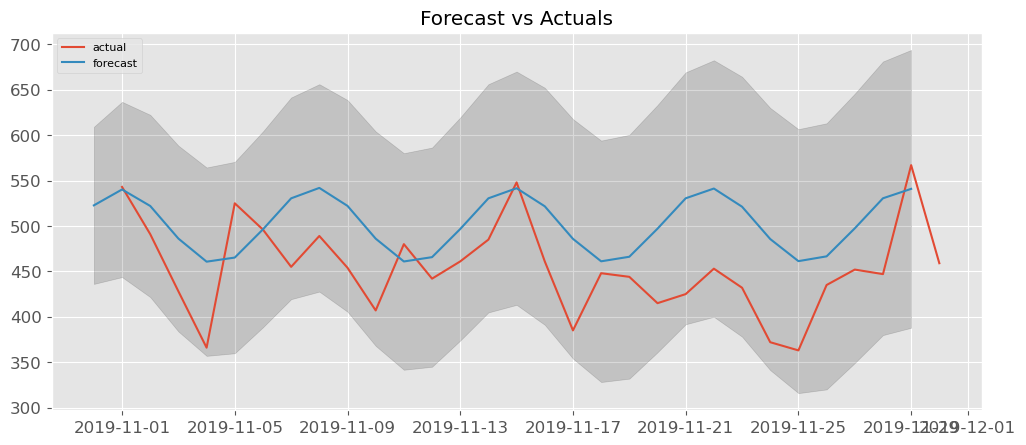

{'Средняя абсолютная процентная ошибка': 0.1400193507963116,
 'Средняя ошибка': 48.27991560421233,
 'Средняя абсолютная ошибка': 59.57017059494959,
 'Средняя ошибка в процентах': 0.11880760156556777,
 'Среднеквадратичная ошибка': 72.55060877345842,
 'Соотношение фактического и прогноза': 0.14339282413822904,
 'Мин-макс ошибка': 0.11586494504409006}

In [97]:
# Forecast
n_periods = 30
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df_training.index[-1], periods = n_periods, freq='D')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(y, label='training')
plt.plot(df_test, label='actual')
plt.plot(fitted_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
forecast_accuracy(fitted,df_test.dtp.values)

## Понедельное прогнозирование значений ДТП

In [102]:
smodel = pm.auto_arima(df_training, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=4,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[4] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=3494.479, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=3347.566, Time=0.39 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=3411.717, Time=0.33 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=3492.833, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[4] intercept   : AIC=3379.323, Time=0.15 sec
 ARIMA(1,0,0)(2,1,0)[4] intercept   : AIC=3337.623, Time=0.74 sec
 ARIMA(1,0,0)(2,1,1)[4] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(1,0,0)(1,1,1)[4] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,0)(2,1,0)[4] intercept   : AIC=3484.541, Time=1.03 sec
 ARIMA(2,0,0)(2,1,0)[4] intercept   : AIC=3331.103, Time=0.68 sec
 ARIMA(2,0,0)(1,1,0)[4] intercept   : AIC=3341.470, Time=0.50 sec
 ARIMA(2,0,0)(2,1,1)[4] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(2,0,0)(1,1,1)[4] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(3,0,0)(2,1,0)[4] intercept   : AIC=3327.843, Time=0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  240
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 4)   Log Likelihood               -1656.917
Date:                           Wed, 05 May 2021   AIC                           3325.833
Time:                                   22:59:54   BIC                           3346.616
Sample:                                        0   HQIC                          3334.211
                                           - 240                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6430      0.060     10.789      0.000       0.526       0.760
ar.L2          0.0854      0.069      1.232      0.218      -0.050       0.221
ar.L3          0.1507      0.067      2.261      0.024       0.020       0.281
ar.S.L4       -0.5302      0.063     -8.361      0.000      -0.654      -0.406
ar.S.L8       -0.2511      0.071     -3.544      0.000      -0.390      -0.112
sigma2      7.346e+04   5093.095     14.422      0.000    6.35e+04    8.34e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               106.80
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -0.72
Prob(H) (two-sided):                  0.99   Kurtosis:                         5.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

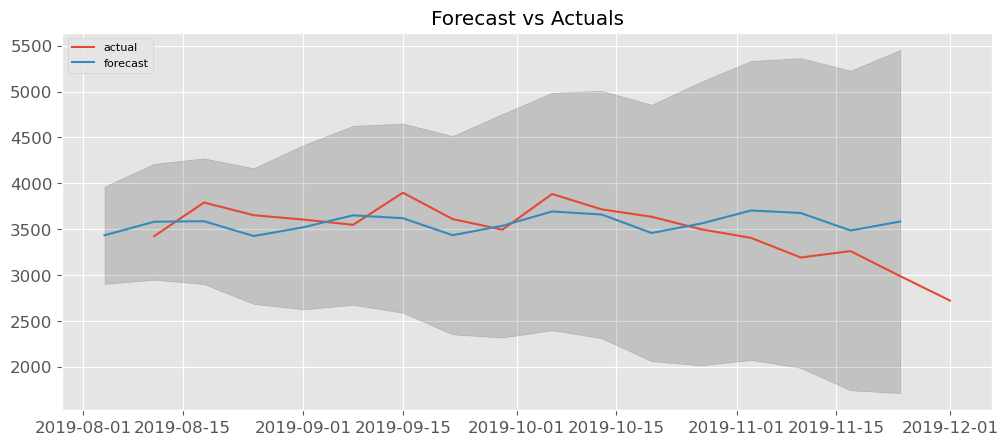

{'Средняя абсолютная процентная ошибка': 0.06738057324039709,
 'Средняя ошибка': 75.83344041791248,
 'Средняя абсолютная ошибка': 216.4913304049319,
 'Средняя ошибка в процентах': 0.030049332725666664,
 'Среднеквадратичная ошибка': 317.69920998977557,
 'Соотношение фактического и прогноза': 0.06243824467947854,
 'Мин-макс ошибка': 0.05924337354174558}

In [104]:
# Forecast
n_periods = 17
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df_training.index[-1], periods = n_periods, freq='W')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(y, label='training')
plt.plot(df_test, label='actual')
plt.plot(fitted_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
forecast_accuracy(fitted,df_test.dtp.values)

## Помесячное прогнозирование значений ДТП

In [110]:
smodel = pm.auto_arima(df_training, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=543.159, Time=0.57 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=553.442, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=543.334, Time=0.39 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=541.150, Time=0.73 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=566.188, Time=0.02 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=551.593, Time=0.16 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=544.073, Time=0.56 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=541.098, Time=1.69 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=2.59 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=550.643, Time=0.26 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=543.953, Time=2.03 sec
 ARIMA(0,0,2)(0,1,2)[12] intercept   : AIC=542.990, Time=3.00 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=541.583, Time=2.13 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=545.044, Time=3.04 sec
 ARIMA(0,0,1)(0,1,2)[12]             

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   47
Model:             SARIMAX(0, 0, 1)x(1, 1, 1, 12)   Log Likelihood                -265.519
Date:                            Wed, 05 May 2021   AIC                            539.037
Time:                                    23:02:33   BIC                            545.259
Sample:                                         0   HQIC                           541.185
                                             - 47                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2089      0.105      1.984      0.047       0.003       0.415
ar.S.L12       0.3686      0.139      2.643      0.008       0.095       0.642
ma.S.L12      -0.7067      0.185     -3.830      0.000      -1.068      -0.345
sigma2      1.893e+05    4.7e+04      4.031      0.000    9.72e+04    2.81e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.86   Jarque-Bera (JB):                 0.11
Prob(Q):                              0.09   Prob(JB):                         0.94
Heteroskedasticity (H):               0.25   Skew:                             0.13
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

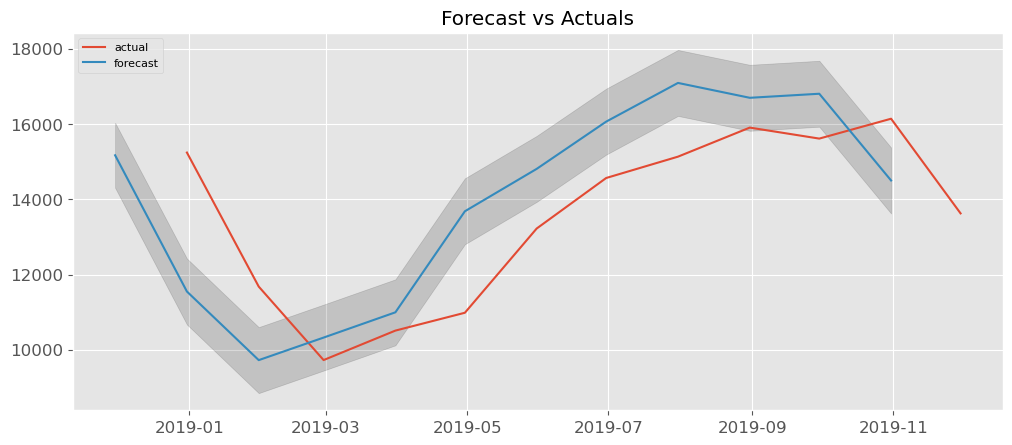

{'Средняя абсолютная процентная ошибка': 0.03307093531084181,
 'Средняя ошибка': 421.66407114177747,
 'Средняя абсолютная ошибка': 486.78262322461086,
 'Средняя ошибка в процентах': 0.027438986918914252,
 'Среднеквадратичная ошибка': 644.1143716099419,
 'Соотношение фактического и прогноза': 0.9911635186796376,
 'Мин-макс ошибка': 0.031390440955553545}

In [111]:
# Forecast
n_periods = 12
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df_training.index[-1], periods = n_periods, freq='M')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(y, label='training')
plt.plot(df_test, label='actual')
plt.plot(fitted_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
forecast_accuracy(fitted,df_test.dtp.values)

## По Москве

## Посуточное прогнозирование значений ДТП

In [87]:
smodel = pm.auto_arima(df_training, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=3,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[3] intercept   : AIC=inf, Time=2.69 sec
 ARIMA(0,0,0)(0,1,0)[3] intercept   : AIC=12445.012, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[3] intercept   : AIC=11960.906, Time=0.58 sec
 ARIMA(0,0,1)(0,1,1)[3] intercept   : AIC=11462.474, Time=0.89 sec
 ARIMA(0,0,0)(0,1,0)[3]             : AIC=12443.014, Time=0.05 sec
 ARIMA(0,0,1)(0,1,0)[3] intercept   : AIC=12441.209, Time=0.23 sec
 ARIMA(0,0,1)(1,1,1)[3] intercept   : AIC=11462.539, Time=1.02 sec
 ARIMA(0,0,1)(0,1,2)[3] intercept   : AIC=11462.666, Time=1.59 sec
 ARIMA(0,0,1)(1,1,0)[3] intercept   : AIC=11961.985, Time=0.45 sec
 ARIMA(0,0,1)(1,1,2)[3] intercept   : AIC=11463.845, Time=4.58 sec
 ARIMA(0,0,0)(0,1,1)[3] intercept   : AIC=11497.916, Time=0.55 sec
 ARIMA(0,0,2)(0,1,1)[3] intercept   : AIC=11446.810, Time=1.15 sec
 ARIMA(0,0,2)(0,1,0)[3] intercept   : AIC=12378.379, Time=0.58 sec
 ARIMA(0,0,2)(1,1,1)[3] intercept   : AIC=11442.645, Time=1.50 sec
 ARIMA(0,0,2)(1,1,0)[3] i

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1765
Model:             SARIMAX(1, 0, 2)x(1, 1, [1], 3)   Log Likelihood               -5707.921
Date:                             Wed, 05 May 2021   AIC                          11427.841
Time:                                     22:51:24   BIC                          11460.687
Sample:                                          0   HQIC                         11439.979
                                            - 1765                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6038      0.082     -7.403      0.000      -0.764      -0.444
ma.L1          0.7724      0.083      9.349      0.000       0.611       0.934
ma.L2          0.2432      0.027      8.885      0.000       0.190       0.297
ar.S.L3        0.1644      0.032      5.210      0.000       0.103       0.226
ma.S.L3       -0.9397      0.010    -98.875      0.000      -0.958      -0.921
sigma2        38.0001      1.184     32.105      0.000      35.680      40.320
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                47.89
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             0.37
Prob(H) (two-sided):                  0.17   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

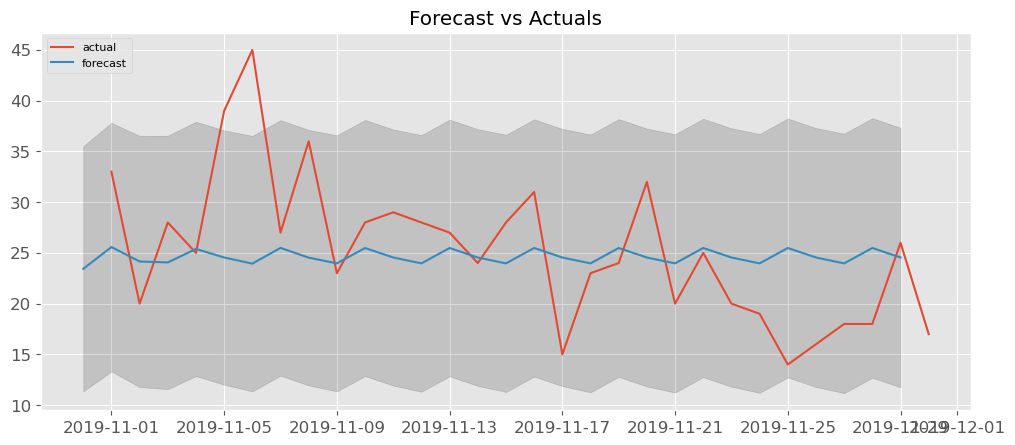

{'Средняя абсолютная процентная ошибка': 0.24004472480411226,
 'Средняя ошибка': -0.6293895967425293,
 'Средняя абсолютная ошибка': 5.6768948251058164,
 'Средняя ошибка в процентах': 0.05400641181451098,
 'Среднеквадратичная ошибка': 7.1636595102735425,
 'Соотношение фактического и прогноза': -0.017398241835869962,
 'Мин-макс ошибка': 0.1947072493032188}

In [88]:
# Forecast
n_periods = 30
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df_training.index[-1], periods = n_periods, freq='D')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(y, label='training')
plt.plot(df_test, label='actual')
plt.plot(fitted_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
forecast_accuracy(fitted,df_test.dtp.values)

## Понедельное прогнозирование значений ДТП

In [80]:
smodel = pm.auto_arima(df_training, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=4,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[4] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=2272.279, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=2226.642, Time=0.26 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=2208.672, Time=0.26 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=2270.279, Time=0.01 sec
 ARIMA(0,0,1)(0,1,0)[4] intercept   : AIC=2255.495, Time=0.15 sec
 ARIMA(0,0,1)(1,1,1)[4] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,0,1)(0,1,2)[4] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,0,1)(1,1,0)[4] intercept   : AIC=2233.145, Time=0.26 sec
 ARIMA(0,0,1)(1,1,2)[4] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(0,0,0)(0,1,1)[4] intercept   : AIC=2240.402, Time=0.15 sec
 ARIMA(0,0,2)(0,1,1)[4] intercept   : AIC=2188.028, Time=0.56 sec
 ARIMA(0,0,2)(0,1,0)[4] intercept   : AIC=2252.946, Time=0.25 sec
 ARIMA(0,0,2)(1,1,1)[4] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,0,2)(0,1,2)[4] intercept   : AIC=inf, Time=0.46 s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  240
Model:             SARIMAX(0, 0, 3)x(0, 1, [1, 2], 4)   Log Likelihood               -1077.981
Date:                                Wed, 05 May 2021   AIC                           2167.961
Time:                                        22:46:06   BIC                           2188.744
Sample:                                             0   HQIC                          2176.339
                                                - 240                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4534      0.064      7.049      0.000       0.327       0.580
ma.L2          0.3469      0.081      4.307      0.000       0.189       0.505
ma.L3          0.2440      0.082      2.994      0.003       0.084       0.404
ma.S.L4       -0.5982      0.078     -7.623      0.000      -0.752      -0.444
ma.S.L8       -0.3324      0.082     -4.076      0.000      -0.492      -0.173
sigma2       524.2086     44.604     11.753      0.000     436.786     611.631
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):                 3.96
Prob(Q):                              0.47   Prob(JB):                         0.14
Heteroskedasticity (H):               0.77   Skew:                            -0.17
Prob(H) (two-sided):                  0.25   Kurtosis:                         3.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

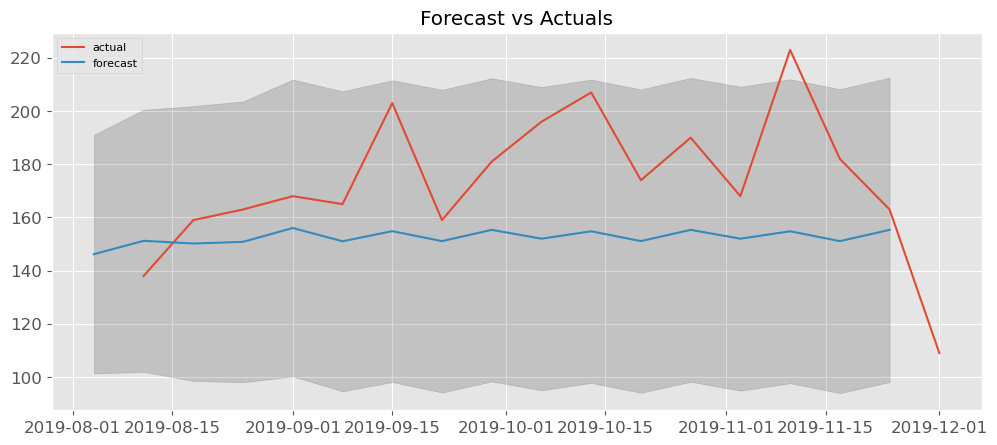

{'Средняя абсолютная процентная ошибка': 0.15414289695784572,
 'Средняя ошибка': -20.87183192546607,
 'Средняя абсолютная ошибка': 27.283993673969583,
 'Средняя ошибка в процентах': -0.09716990042178161,
 'Среднеквадратичная ошибка': 33.49133709686985,
 'Соотношение фактического и прогноза': -0.0034270954829010015,
 'Мин-макс ошибка': 0.14649090437251433}

In [81]:
# Forecast
n_periods = 17
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df_training.index[-1], periods = n_periods, freq='W')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(y, label='training')
plt.plot(df_test, label='actual')
plt.plot(fitted_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
forecast_accuracy(fitted,df_test.dtp.values)

## Помесячное прогнозирование значений ДТП

In [40]:
smodel = pm.auto_arima(df_training, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=392.542, Time=0.38 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=396.654, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=395.869, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=390.906, Time=0.25 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=393.285, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.71 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=1.38 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=392.836, Time=0.21 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=2.13 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=396.595, Time=0.14 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=392.579, Time=0.50 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.49 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=394.541, Time=0.90 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.58 sec

Best model:  ARIMA(0,1,1)(0,1,1)[12]          
Total

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   47
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -192.453
Date:                            Wed, 05 May 2021   AIC                            390.906
Time:                                    22:02:13   BIC                            395.485
Sample:                                         0   HQIC                           392.467
                                             - 47                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5853      0.159     -3.692      0.000      -0.896      -0.275
ma.S.L12      -0.6918      0.513     -1.350      0.177      -1.696       0.313
sigma2      3927.8774   1910.811      2.056      0.040     182.757    7672.998
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.51
Prob(Q):                              0.96   Prob(JB):                         0.78
Heteroskedasticity (H):               0.92   Skew:                            -0.02
Prob(H) (two-sided):                  0.89   Kurtosis:                         2.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

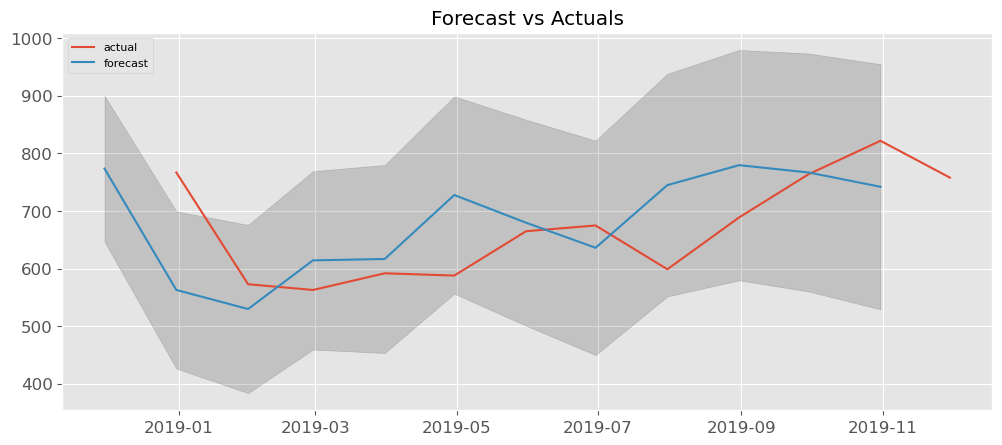

{'Средняя абсолютная процентная ошибка': 0.04376298313879132,
 'Средняя ошибка': 10.061695977776944,
 'Средняя абсолютная ошибка': 29.033512604489705,
 'Средняя ошибка в процентах': 0.01645589128658514,
 'Среднеквадратичная ошибка': 34.88388446845102,
 'Соотношение фактического и прогноза': 0.922229877474188,
 'Мин-макс ошибка': 0.04191785413732385}

In [72]:
# Forecast
n_periods = 12
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df_training.index[-1], periods = n_periods, freq='M')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(y, label='training')
plt.plot(df_test, label='actual')
plt.plot(fitted_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
forecast_accuracy(fitted,df_test.dtp.values)